In [1]:
!pip3 install tensorflow_hub tensorflow scikit-learn pillow numpy

In [2]:
from PIL import Image
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow_hub as tf_hub
import tensorflow as tf

Taco Image Count: 101
Random Image Count: 101
Not adding 000000007888.jpg due to improper shape...
Image total: 201


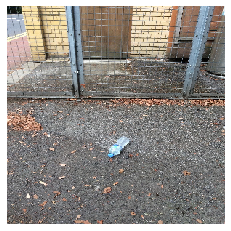

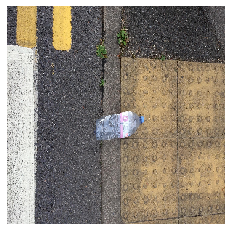

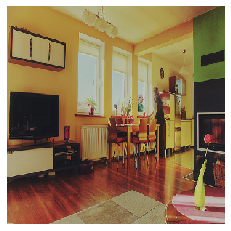

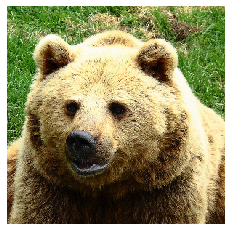

In [3]:
# Load and split image data
taco_data_path = '../TACO/data/batch_1'
taco_image_files = os.listdir(taco_data_path)
taco_img_count = len(taco_image_files)

random_data_path = 'val2017'
random_image_files = os.listdir(random_data_path)[:taco_img_count]
random_img_count = len(random_image_files)
print(f"Taco Image Count: {taco_img_count}\nRandom Image Count: {random_img_count}")

images = []

def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((300, 300))    
    img = np.asarray(img)/256.0    
    return img
    
for i, img in enumerate(taco_image_files):
    # Load image
    I = preprocess_image(taco_data_path + '/' + img)
    
    # Show image
    if i < 2:
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)
    
    if I.shape == (300, 300, 3):
        images.append(I)
    else:
        print(f"Not adding {img} due to improper shape...")
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)
        
pos_label_count = len(images)
labels = [1]*pos_label_count
    
for i, img in enumerate(random_image_files):
    # Load image
    I = preprocess_image(random_data_path + '/' + img)
    
    # Show image
    if i < 2:
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)

    if I.shape == (300, 300, 3):
        images.append(I)
    else:
        print(f"Not adding {img} due to improper shape...")
    
# split data
labels = labels + [0]*(len(images)-pos_label_count)
print(f"Image total: {len(images)}")

train_x, val_x, train_y, val_y = train_test_split(np.array(images), np.array(labels), test_size=0.20, random_state=7)

In [4]:
# create basic mobilenet binary classification model - TF 2.0 model layer
model = tf.keras.Sequential([
    tf_hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_128/feature_vector/4", trainable=False),  
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [5]:
model.fit(train_x, train_y, batch_size=32, epochs=5, validation_data=(val_x, val_y))

Train on 160 samples, validate on 41 samples
Epoch 1/5
160/160 [==============================] - 13s 81ms/sample - loss: 3.7576 - accuracy: 0.5437 - val_loss: 4.1068 - val_accuracy: 0.6098
Epoch 2/5
160/160 [==============================] - 10s 62ms/sample - loss: 4.6464 - accuracy: 0.6125 - val_loss: 4.3083 - val_accuracy: 0.6585
Epoch 3/5
160/160 [==============================] - 10s 65ms/sample - loss: 4.5237 - accuracy: 0.6313 - val_loss: 2.9952 - val_accuracy: 0.6829
Epoch 4/5
160/160 [==============================] - 10s 65ms/sample - loss: 2.8688 - accuracy: 0.6750 - val_loss: 1.7935 - val_accuracy: 0.7073
Epoch 5/5
160/160 [==============================] - 10s 62ms/sample - loss: 1.2063 - accuracy: 0.7500 - val_loss: 1.7467 - val_accuracy: 0.7561


array([[0.7216926]], dtype=float32)

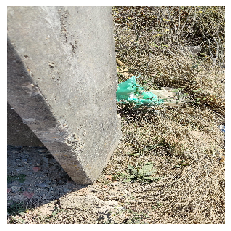

In [6]:
# example prediction
test_img = preprocess_image('../TACO/data/batch_10/000006.jpg')
fig,ax = plt.subplots(1)
plt.axis('off')
plt.imshow(test_img)

model.predict(np.array([test_img]),
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)